<span style="color:blue; font-size:35px;">Multiple-regression Method</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tabulate import tabulate


In [3]:
df=pd.read_csv('Student_Performance.csv')
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
df.head(6)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0


In [5]:
le=LabelEncoder()
df["Extracurricular Activities"]=le.fit_transform(df["Extracurricular Activities"])
df.head(6)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
y=df['Performance Index']

for i in df.columns:
    if(df[i].name != y.name):
        print(i)

Hours Studied
Previous Scores
Extracurricular Activities
Sleep Hours
Sample Question Papers Practiced


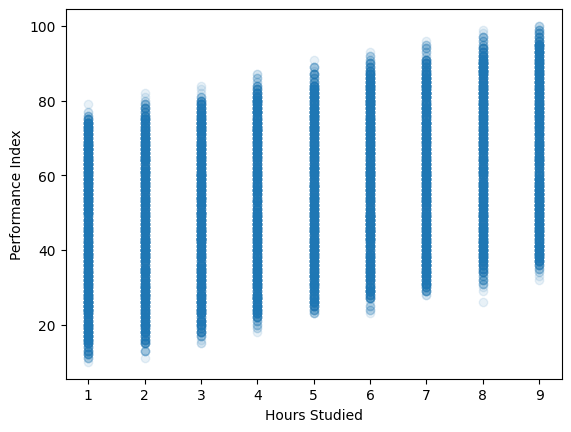

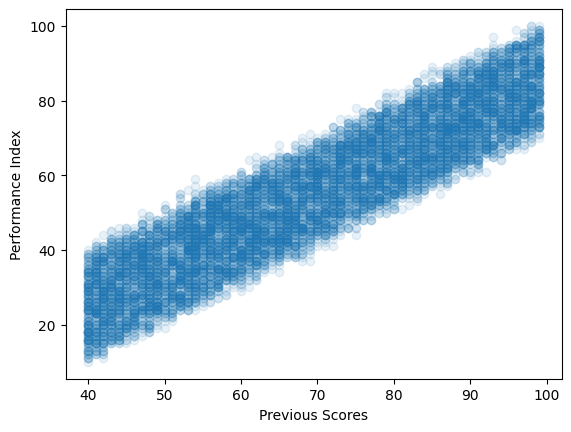

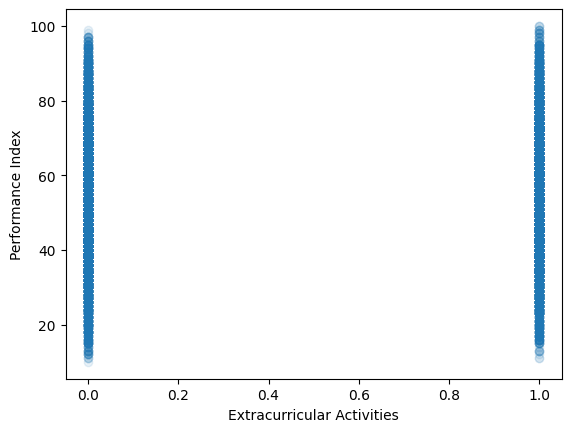

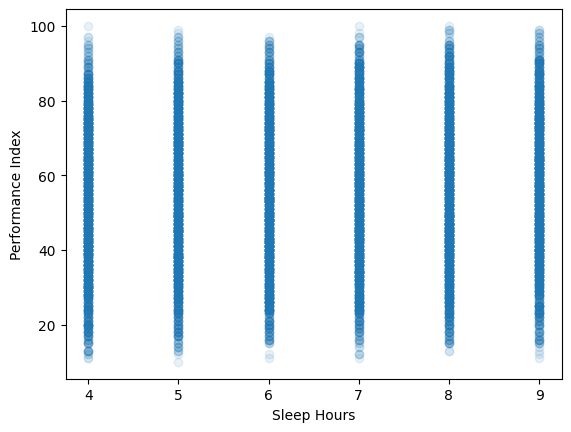

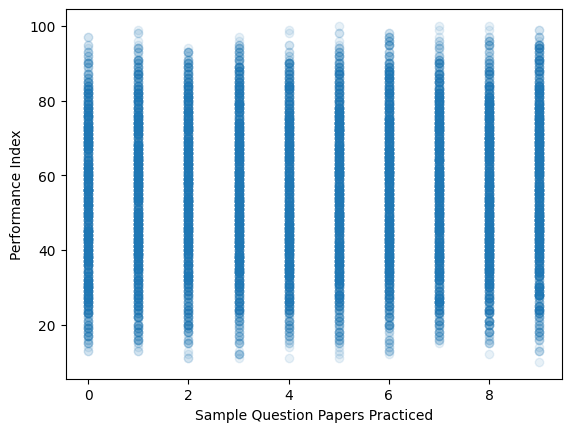

In [8]:
y=df['Performance Index']

for i in df.columns:
    if(df[i].name != y.name):
        plt.scatter(df[i],y,alpha=0.1)
        plt.xlabel(df[i].name)
        plt.ylabel('Performance Index')
        plt.show()


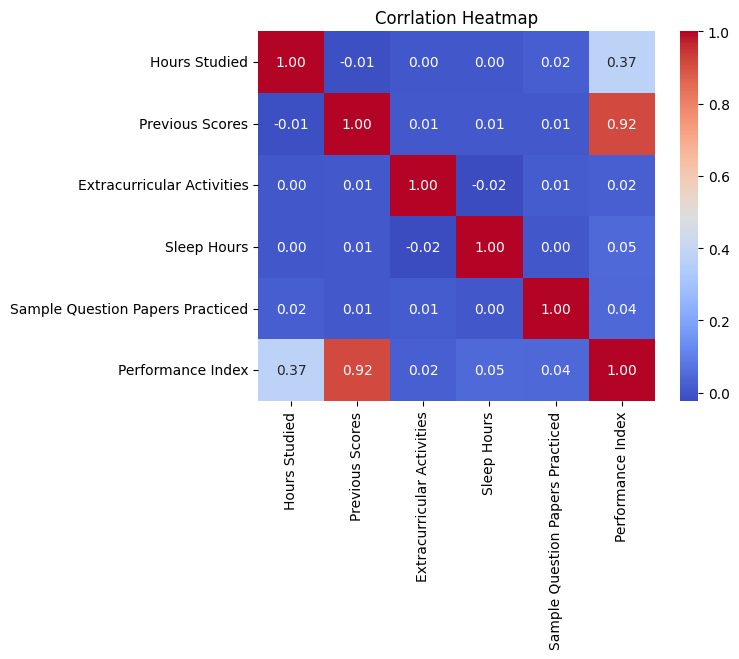

In [9]:
corr=df.corr()
plt.Figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Corrlation Heatmap")
plt.show()

In [10]:
x=np.array(df['Previous Scores']).reshape(-1,1)

linear_model=LinearRegression()
linear_model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred=linear_model.predict(x)
tabel=np.column_stack((y,y_pred))
print(tabulate(tabel[:5],headers=("Actual Performance Index",'Predict Performance Index'),tablefmt='fancy_grid'))

╒════════════════════════════╤═════════════════════════════╕
│   Actual Performance Index │   Predict Performance Index │
╞════════════════════════════╪═════════════════════════════╡
│                         91 │                     85.188  │
├────────────────────────────┼─────────────────────────────┤
│                         65 │                     67.9528 │
├────────────────────────────┼─────────────────────────────┤
│                         45 │                     36.5239 │
├────────────────────────────┼─────────────────────────────┤
│                         36 │                     37.5377 │
├────────────────────────────┼─────────────────────────────┤
│                         66 │                     60.856  │
╘════════════════════════════╧═════════════════════════════╛


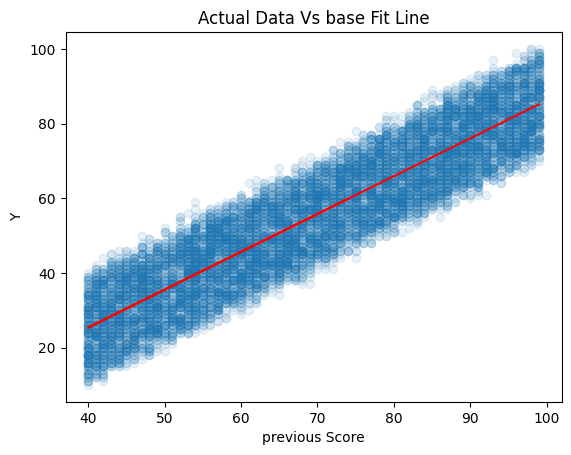

In [13]:
plt.scatter(x,y,alpha=0.1)
plt.plot(x,y_pred,color='r')
plt.xlabel('previous Score')
plt.ylabel('Y')
plt.title("Actual Data Vs base Fit Line")
plt.show()

In [14]:
R_Squared=np.round(r2_score(y,y_pred),4)
print("R_Squared:",R_Squared)
MAE=np.round(mean_absolute_error(y,y_pred),4)
print("MAE",MAE)
RMSE=np.round(np.sqrt(mean_squared_error(y,y_pred)),4)
print("RMSE",RMSE)

R_Squared: 0.8376
MAE 6.61
RMSE 7.7427


In [15]:
x = df.drop(['Performance Index','Sleep Hours','Sample Question Papers Practiced'], axis=1)
linear_model.fit(x,y)
print(x)

      Hours Studied  Previous Scores  Extracurricular Activities
0                 7               99                           1
1                 4               82                           0
2                 8               51                           1
3                 5               52                           1
4                 7               75                           0
...             ...              ...                         ...
9995              1               49                           1
9996              7               64                           1
9997              6               83                           1
9998              9               97                           1
9999              7               74                           0

[10000 rows x 3 columns]


In [16]:
final_pred = linear_model.predict(x)
table2 = np.column_stack((y,final_pred))

print(tabulate(table2[:5], headers=("Actual_Data","Data_Predicted"), tablefmt="fancy_grid"))

╒═══════════════╤══════════════════╕
│   Actual_Data │   Data_Predicted │
╞═══════════════╪══════════════════╡
│            91 │          91.3724 │
├───────────────┼──────────────────┤
│            65 │          64.8889 │
├───────────────┼──────────────────┤
│            45 │          45.3185 │
├───────────────┼──────────────────┤
│            36 │          37.766  │
├───────────────┼──────────────────┤
│            66 │          66.3276 │
╘═══════════════╧══════════════════╛


In [17]:
R_Squared=np.round(r2_score(y,final_pred),4)
print("R_Squared:",R_Squared)
MAE=np.round(mean_absolute_error(y,final_pred),4)
print("MAE",MAE)
RMSE=np.round(np.sqrt(mean_squared_error(y,final_pred)),4)
print("RMSE",RMSE)

R_Squared: 0.9861
MAE 1.7995
RMSE 2.2644
